In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

In [62]:
def get_raw_df():
    return pd.read_csv(r"C:\Users\91910\Desktop\IIT_Kanpur\Semester6\MSE643A\Project\bandGap\dielectric_constant_data.csv")

def get_propsFromStruct(df): #returns len, angles and periodic properties of a crystal structure for all compounds
    structure_arr = []

    for struct in df['structure']:
        finalStruct_arr = []
        modLen_arr = []
        modAngl_arr = []
        #modPerio_arr = []
        split_arr = struct.split('\n')
        len_arr = split_arr[2].split()[2:]
        angl_arr = split_arr[3].split()[1:]
        #perio_arr = split_arr[4].split()[2:]
        for i in range(3):
            modLen_arr.append(float(len_arr[i]))
            modAngl_arr.append(float(angl_arr[i]))
        for ele in modLen_arr:
            finalStruct_arr.append(ele)
        for ele in modAngl_arr:
            finalStruct_arr.append(ele)
#         for ele in perio_arr:
#             finalStruct_arr.append(ele)
        structure_arr.append(finalStruct_arr)
        
    return np.array(structure_arr)

def transform_raw_e_electronic(df): #transforms e_electronic into model readable values
    res = []
    for tensor_per_struct in df['e_electronic']:
        tensor_split = tensor_per_struct[2:-2].split(',')
        for i in range(len(tensor_split)):
            if (i==2 or i==5):
                tensor_split[i] = tensor_split[i].strip()[:-1]
            elif (i==3 or i==6):
                tensor_split[i] = tensor_split[i].strip()[1:]
        for j in range(len(tensor_split)):
            tensor_split[j] = float(tensor_split[j])
        res.append(tensor_split)
    return np.array(res)

def transform_raw_e_total(df): #transforms e_total into model readable values
    res = []
    for tensor_per_struct in df['e_total']:
        tensor_split = tensor_per_struct[2:-2].split(',')
        for i in range(len(tensor_split)):
            if (i==2 or i==5):
                tensor_split[i] = tensor_split[i].strip()[:-1]
            elif (i==3 or i==6):
                tensor_split[i] = tensor_split[i].strip()[1:]
        for j in range(len(tensor_split)):
            tensor_split[j] = float(tensor_split[j])
        res.append(tensor_split)
    return np.array(res)

def get_mod_df():
    raw_df = get_raw_df()
    mod_df = raw_df.copy()
    mod_df.drop(raw_df.columns[[0,1,2,6,8,9,14,15,16]], inplace= True, axis= 1)
    transformed_e_electronic = transform_raw_e_electronic(raw_df)
    transformed_e_total = transform_raw_e_total(raw_df)
    propsFromStruct_arr = get_propsFromStruct(raw_df)
    for i in range(9):
        mod_df['e_e_' + str(i)] = transformed_e_electronic[:, i]
    for i in range(9):
        mod_df['e_t_' + str(i)] = transformed_e_total[:, i]
    mod_df['len_a'] = propsFromStruct_arr[:,0]
    mod_df['len_b'] = propsFromStruct_arr[:,1]
    mod_df['len_c'] = propsFromStruct_arr[:,2]
    mod_df['angl_alpha'] = propsFromStruct_arr[:,3]
    mod_df['angl_beta'] = propsFromStruct_arr[:,4]
    mod_df['angl_gamma'] = propsFromStruct_arr[:,5]
    #below are excluded as they are true for all the compounds
#     mod_df['prd_p'] = propsFromStruct_arr[:,6]
#     mod_df['prd_b'] = propsFromStruct_arr[:,7]
#     mod_df['prd_c'] = propsFromStruct_arr[:,8]
    return mod_df

def transform_boolData(df, col_name): #1d array must be given
    le = LabelEncoder()
    df[col_name] = le.fit_transform(df[col_name])
    
def scale_features(df):
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df)
    return scaled_df
    
def normal_split(df, test_size, shuffle):
    X = df.drop('band_gap', axis=1)
    y = df['band_gap']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=shuffle)
    
    return (X_train, X_test, y_train, y_test)

def evaluate_metrics(y_test, y_preds):
    r2 = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
    evs = explained_variance_score(y_test, y_preds)

    print('r2 score is ', r2)
    print('mean absolute error is ', mae)
    print('explained variance score is ', evs)

In [63]:
mod_df = get_mod_df()

mod_df

,nsites,space_group,volume,band_gap,n,poly_electronic,poly_total,pot_ferroelectric,e_e_0,e_e_1,...,e_t_5,e_t_6,e_t_7,e_t_8,len_a,len_b,len_c,angl_alpha,angl_beta,angl_gamma
0,3,225,159.501208,1.88,1.86,3.44,6.23,False,3.441158,-3.097000e-05,...,2.481000e-05,-0.000095,2.175000e-05,6.235207,6.087322,6.087322,6.087323,60.000003,60.000002,59.999999
1,3,166,84.298097,3.52,1.78,3.16,6.73,False,3.346884,-4.498543e-02,...,-9.046643e-01,-1.463589,-9.046600e-01,3.945366,6.710024,6.710024,6.710023,34.019895,34.019897,34.019896
2,3,164,108.335875,1.17,2.23,4.97,10.64,False,5.543085,-5.280000e-06,...,4.435100e-04,0.000123,4.420300e-04,4.315681,4.158086,4.158086,7.235270,90.000000,90.000000,120.000001
3,4,186,88.162562,1.12,2.65,7.04,17.99,False,7.093167,7.990000e-06,...,2.064269e-02,-0.008708,1.761772e-02,20.396643,4.132865,4.132865,5.960067,90.000000,90.000000,119.999995
4,6,136,82.826401,2.87,1.53,2.35,7.12,False,2.423962,7.452000e-05,...,1.344158e-02,0.001279,1.441676e-02,7.459124,3.354588,4.968952,4.968952,90.000000,90.000000,90.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,7,111,212.493121,0.87,2.77,7.67,11.76,True,7.748968,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,11.562826,5.912075,5.912075,6.079460,90.000000,90.000000,90.000000
1052,8,194,220.041363,3.60,2.00,3.99,7.08,True,4.405044,6.100000e-07,...,-1.000000e-08,0.000000,-1.000000e-08,3.696193,4.137833,4.137856,14.839681,90.000000,90.000000,119.999810
1053,4,216,73.882306,0.14,14.58,212.61,232.60,True,212.607502,-1.843000e-05,...,1.830120e-03,0.002588,1.830120e-03,232.596394,4.709974,4.709973,4.709974,59.999995,59.999999,60.000000
1054,5,221,177.269065,0.21,2.53,6.41,22.44,True,6.405117,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,22.438270,5.617516,5.617516,5.617516,90.000000,90.000000,90.000000


In [64]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [65]:
X_train, X_test, y_train, y_test = normal_split(mod_df, 0.15, True)

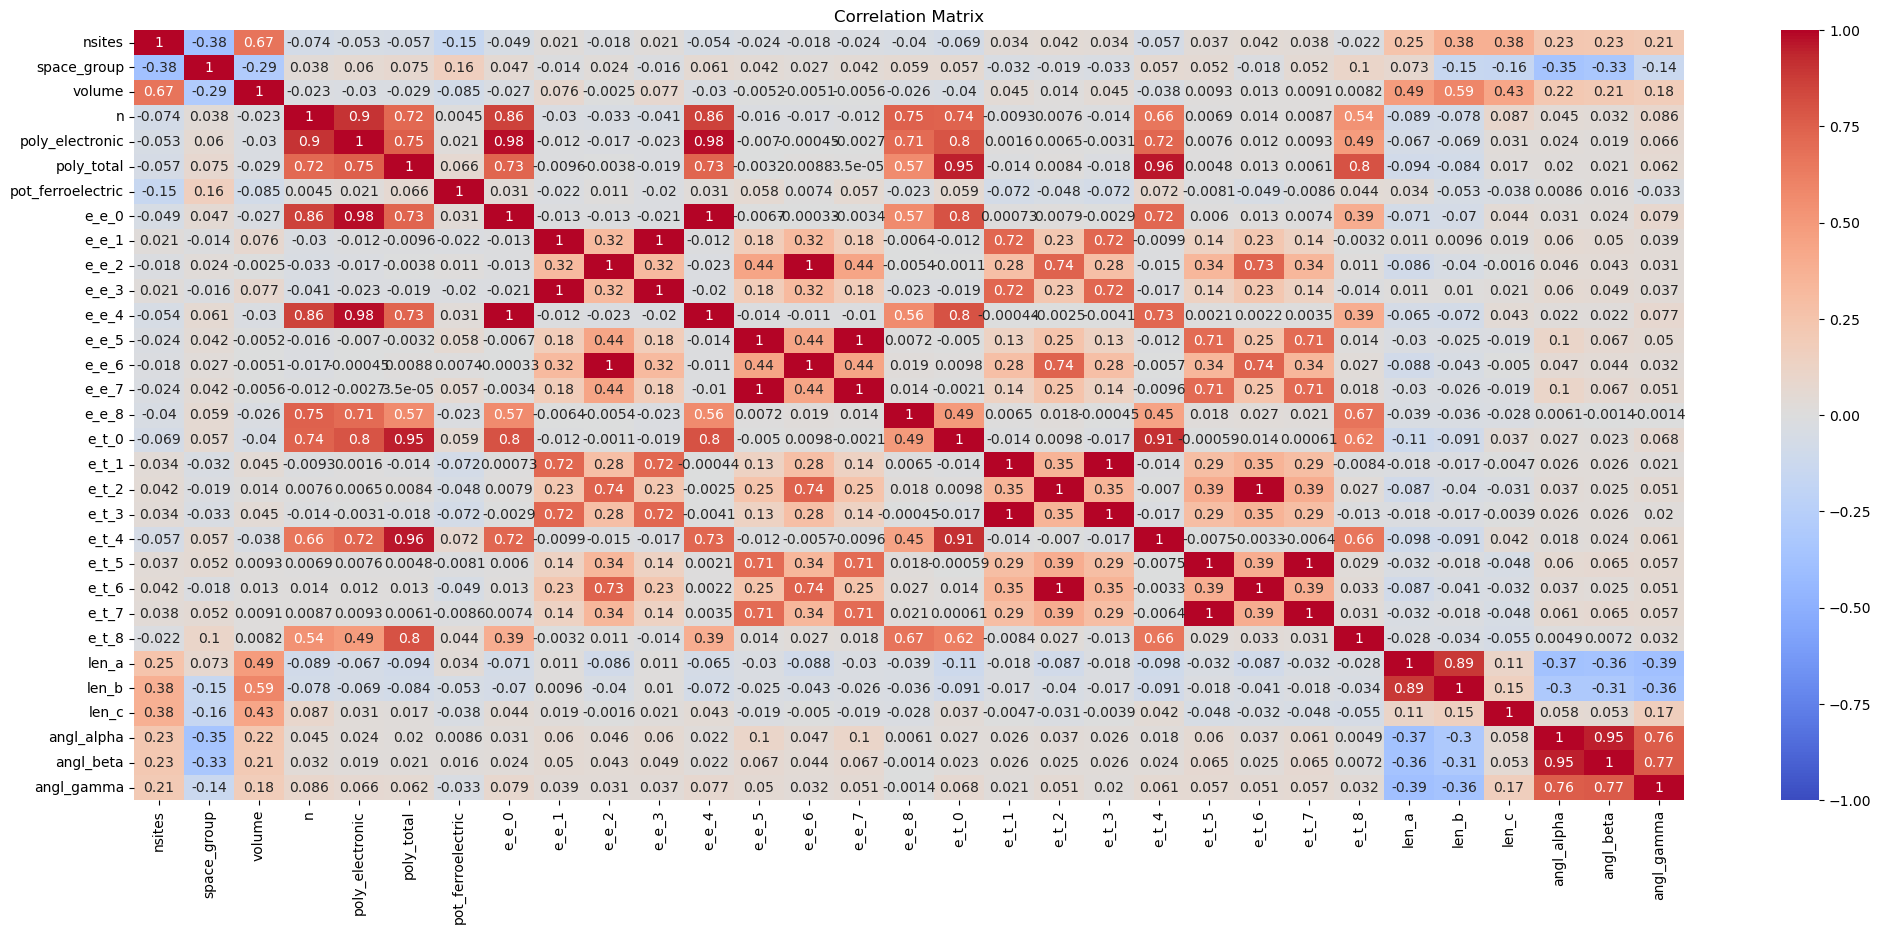

In [66]:
corr_mat = X_train.corr()

plt.figure(figsize=(25, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [67]:
correlation(X_train, 0.85)

{'angl_beta',
 'e_e_0',
 'e_e_3',
 'e_e_4',
 'e_e_6',
 'e_e_7',
 'e_t_0',
 'e_t_3',
 'e_t_4',
 'e_t_6',
 'e_t_7',
 'len_b',
 'poly_electronic'}

In [68]:
X_train_corr = X_train.drop(columns=correlation(X_train, 0.85), axis=1)
X_test_corr = X_test.drop(columns=correlation(X_train, 0.85), axis=1)

X_train_corr

,nsites,space_group,volume,n,poly_total,pot_ferroelectric,e_e_1,e_e_2,e_e_5,e_e_8,e_t_1,e_t_2,e_t_5,e_t_8,len_a,len_c,angl_alpha,angl_gamma
12,3,225,69.537895,2.23,8.42,False,0.000034,-0.000012,-6.860000e-06,4.967068,-4.365200e-04,-1.560300e-04,-1.039000e-04,8.423227,4.615785,4.615784,60.000001,60.000003
307,12,189,343.822654,2.73,12.79,False,0.000078,-0.000043,-8.145000e-05,9.513032,2.093500e-04,-1.467000e-05,-1.641700e-04,16.965765,8.100385,6.050517,90.000000,120.000000
371,14,15,191.599724,1.65,5.99,False,-0.100676,-0.011132,-1.210522e-02,2.771285,1.020337e+00,6.747000e-01,7.393600e-01,6.151129,5.534123,7.312596,68.035217,87.064735
914,7,82,189.718519,2.73,11.06,True,0.013192,0.022335,2.799614e-02,7.467602,3.749451e-02,6.356777e-02,7.963423e-02,11.122676,5.875322,6.889534,115.238976,89.999999
290,8,176,349.831956,1.49,2.37,True,-0.000066,-0.000035,7.170000e-06,1.852914,-3.555000e-05,-5.706000e-05,1.439000e-05,1.853091,7.000120,8.243618,90.000000,120.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,8,194,353.715043,2.84,13.83,False,-0.000011,-0.000034,-1.295400e-04,8.842169,2.702000e-05,-2.128500e-04,-1.217060e-03,14.939210,6.127727,10.877375,90.000000,120.000005
466,4,166,54.633956,2.15,10.55,True,0.000000,0.000000,2.100000e-07,3.906257,1.000000e-08,-1.000000e-08,4.730000e-06,8.637382,6.529411,6.529411,28.121970,28.121968
121,5,217,87.578887,1.28,2.17,False,0.000035,0.000021,-3.540000e-06,1.630310,5.974400e-04,-2.071500e-04,-1.544160e-03,2.168502,4.845521,4.845520,109.471215,109.471224
1044,4,166,139.017820,2.26,13.09,True,-0.056863,-0.338594,-2.054745e-01,4.344032,-2.928209e-01,-1.743245e+00,-1.057886e+00,9.109768,8.403218,8.403218,30.925733,30.925728


In [69]:
regr1 = DecisionTreeRegressor()
regr1.fit(X_train_corr, y_train)
y_preds1 = regr1.predict(X_test_corr)

evaluate_metrics(y_test, y_preds1)

r2 score is  0.5708431970591686
mean absolute error is  0.730566037735849
explained variance score is  0.5751224531081836


In [70]:
regr2 = RandomForestRegressor()
regr2.fit(X_train_corr, y_train)
y_preds2 = regr2.predict(X_test_corr)

evaluate_metrics(y_test, y_preds2)

r2 score is  0.7625052991111848
mean absolute error is  0.5722930817610062
explained variance score is  0.7629650871193143


In [71]:
regr3 = GradientBoostingRegressor()
regr3.fit(X_train_corr, y_train)
y_preds3 = regr3.predict(X_test_corr)

evaluate_metrics(y_test, y_preds3)

r2 score is  0.7650313329219931
mean absolute error is  0.6065006164636053
explained variance score is  0.7662022292933481


In [54]:
transform_boolData(X_train_corr, 'pot_ferroelectric')
transform_boolData(X_test_corr, 'pot_ferroelectric')

X_train_corr

,nsites,space_group,volume,n,poly_total,pot_ferroelectric,e_e_1,e_e_2,e_e_5,e_t_1,e_t_2,e_t_5,len_a,len_c,angl_alpha,angl_gamma
310,4,36,145.521118,3.02,12.48,0,-0.128835,0.000640,9.983400e-04,-1.824314e-01,-7.414520e-03,-1.448878e-02,4.675752,7.636903,90.000000,60.642441
493,9,162,125.649892,2.28,14.44,1,-0.000118,0.000567,9.823000e-04,-2.020685e-02,3.954385e-02,6.849700e-02,5.358452,5.052976,89.997369,119.998719
104,4,129,92.406572,2.19,11.57,0,0.000003,0.000028,2.777000e-05,-9.728000e-05,9.780800e-04,9.887800e-04,3.913750,6.032769,90.000000,90.000000
97,4,71,176.931872,1.73,5.86,0,0.030535,-0.025786,-6.929421e-02,1.313331e-01,4.525379e-02,-2.152550e-01,5.286060,6.420287,69.888581,65.690305
328,2,225,55.005179,1.67,8.88,0,0.000001,-0.000001,1.690000e-06,4.567100e-04,2.005900e-04,1.452000e-04,4.268803,4.268804,60.000000,60.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,8,194,353.715043,2.84,13.83,0,-0.000011,-0.000034,-1.295400e-04,2.702000e-05,-2.128500e-04,-1.217060e-03,6.127727,10.877375,90.000000,120.000005
466,4,166,54.633956,2.15,10.55,1,0.000000,0.000000,2.100000e-07,1.000000e-08,-1.000000e-08,4.730000e-06,6.529411,6.529411,28.121970,28.121968
121,5,217,87.578887,1.28,2.17,0,0.000035,0.000021,-3.540000e-06,5.974400e-04,-2.071500e-04,-1.544160e-03,4.845521,4.845520,109.471215,109.471224
1044,4,166,139.017820,2.26,13.09,1,-0.056863,-0.338594,-2.054745e-01,-2.928209e-01,-1.743245e+00,-1.057886e+00,8.403218,8.403218,30.925733,30.925728


In [72]:
scaled_X_train_corr = pd.DataFrame(scale_features(X_train_corr), columns= X_train_corr.columns)
scaled_X_test_corr = pd.DataFrame(scale_features(X_test_corr), columns= X_test_corr.columns)

scaled_y_train = scale_features(np.array(y_train).reshape(len(y_train),1))
scaled_y_test = scale_features(np.array(y_test).reshape(len(y_test),1))

scaled_X_train_corr

,nsites,space_group,volume,n,poly_total,pot_ferroelectric,e_e_1,e_e_2,e_e_5,e_e_8,e_t_1,e_t_2,e_t_5,e_t_8,len_a,len_c,angl_alpha,angl_gamma
0,-1.340771,1.214008,-0.987606,-0.166001,-0.320187,-1.443078,0.003860,0.055731,0.052806,-0.144065,0.020236,0.071860,0.086025,-0.298607,-0.449188,-0.912477,-0.941921,-0.945957
1,1.312832,0.674723,1.803029,0.261636,-0.108902,-1.443078,0.004219,0.055598,0.052427,0.338737,0.022434,0.072087,0.085898,0.194468,1.629232,-0.372381,0.360211,1.286067
2,1.902521,-1.931817,0.254279,-0.662060,-0.437675,-1.443078,-0.821258,0.007702,-0.008674,-0.377266,3.493526,1.155402,1.647457,-0.429753,0.098562,0.102720,-0.593158,0.060862
3,-0.161392,-0.928149,0.235139,0.261636,-0.192546,0.692963,0.111656,0.152252,0.195109,0.121503,0.149300,0.174175,0.254398,-0.142795,0.302073,-0.056539,1.455694,0.170055
4,0.133453,0.479982,1.864169,-0.798904,-0.612698,0.692963,0.003034,0.055633,0.052878,-0.474801,0.021600,0.072019,0.086275,-0.677835,0.972969,0.453197,0.360211,1.286067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,0.133453,0.749624,1.903677,0.355716,-0.058620,-1.443078,0.003486,0.055634,0.052183,0.267488,0.021813,0.071769,0.083674,0.077495,0.452623,1.444657,0.360211,1.286067
893,-1.045927,0.330181,-1.139242,-0.234423,-0.217204,0.692963,0.003578,0.055782,0.052842,-0.256727,0.021721,0.072111,0.086254,-0.286246,0.692211,-0.192105,-2.325569,-2.131833
894,-0.751082,1.094167,-0.804053,-0.978511,-0.622368,-1.443078,0.003866,0.055872,0.052823,-0.498443,0.023754,0.071778,0.082984,-0.659630,-0.312160,-0.825994,1.205347,0.894392
895,-1.045927,0.330181,-0.280701,-0.140343,-0.094398,0.692963,-0.462295,-1.406643,-0.991316,-0.210234,-0.974633,-2.726823,-2.147560,-0.258980,1.809859,0.513277,-2.203873,-2.027532


In [73]:
regr4 = svm.SVR()
regr4.fit(scaled_X_train_corr, scaled_y_train)
y_preds4 = regr4.predict(scaled_X_test_corr)

evaluate_metrics(scaled_y_test, y_preds4)

r2 score is  0.6949488774529136
mean absolute error is  0.40743742413710593
explained variance score is  0.6976561499802413


C:\Users\91910\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
regr5 = KNeighborsRegressor()
regr5.fit(scaled_X_train_corr, scaled_y_train)
y_preds5 = regr5.predict(scaled_X_test_corr)

evaluate_metrics(scaled_y_test, y_preds5)

r2 score is  0.5739115761582896
mean absolute error is  0.46137004019569844
explained variance score is  0.5776784629131404
